# Airline Passenger Satisfication Prediction

### Importing Required Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [47]:
# Airline dataset loaded
airline_dataset = pd.read_csv('Airline_Passenger_Satisfaction.csv')

In [48]:
# Getting 15000 random sample data to process
airline_dataset = airline_dataset.sample(n=15000)

In [49]:
# Getting the shape
airline_dataset.shape

(15000, 25)

In [50]:
# Getting first 10 rows
airline_dataset.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
52755,52755,38003,Female,Loyal Customer,30,Business travel,Business,1249,1,1,...,5,5,1,5,4,5,5,22,15.0,satisfied
78434,78434,122442,Female,Loyal Customer,50,Business travel,Business,2693,5,5,...,4,4,4,4,3,4,3,0,15.0,satisfied
15248,15248,22765,Male,Loyal Customer,48,Business travel,Business,1665,4,4,...,3,3,4,5,3,3,5,22,7.0,satisfied
44986,44986,49502,Male,Loyal Customer,27,Business travel,Business,3989,5,5,...,5,5,2,4,2,5,5,0,0.0,satisfied
26963,26963,70924,Male,Loyal Customer,30,Business travel,Business,612,4,4,...,4,4,4,5,5,5,4,0,0.0,satisfied
6574,6574,60801,Female,disloyal Customer,27,Business travel,Eco,472,3,2,...,1,3,5,3,2,4,1,19,51.0,neutral or dissatisfied
91115,91115,84467,Female,Loyal Customer,29,Business travel,Business,2979,2,2,...,4,4,5,5,5,5,4,0,0.0,satisfied
60073,60073,118273,Female,Loyal Customer,40,Business travel,Business,2740,1,1,...,4,4,4,5,5,4,3,26,9.0,satisfied
70940,70940,99889,Female,Loyal Customer,41,Business travel,Business,2854,1,1,...,3,3,3,3,5,3,5,1,NaN,satisfied
58620,58620,68192,Female,Loyal Customer,66,Business travel,Eco Plus,197,5,5,...,5,5,5,5,3,5,1,9,5.0,satisfied


In [51]:
# Getting last 10 rows
airline_dataset.tail(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
7946,7946,125668,Male,Loyal Customer,32,Business travel,Business,899,4,4,...,3,4,5,4,3,5,3,0,0.0,satisfied
26015,26015,34365,Male,Loyal Customer,51,Personal Travel,Eco,541,1,3,...,5,1,3,3,3,4,5,36,92.0,neutral or dissatisfied
44856,44856,55416,Male,Loyal Customer,53,Business travel,Business,2521,2,2,...,3,5,5,4,5,3,5,0,0.0,satisfied
24867,24867,43826,Male,Loyal Customer,40,Business travel,Eco,199,4,3,...,4,5,5,4,3,4,4,0,0.0,satisfied
47915,47915,10148,Female,Loyal Customer,34,Personal Travel,Eco,1190,4,5,...,5,3,4,3,5,4,5,0,0.0,satisfied
78204,78204,12930,Female,Loyal Customer,56,Personal Travel,Eco,359,4,4,...,3,3,4,3,3,3,1,0,0.0,neutral or dissatisfied
11340,11340,111936,Female,Loyal Customer,51,Business travel,Business,3590,4,4,...,5,5,5,5,3,5,5,4,0.0,satisfied
69696,69696,9571,Female,Loyal Customer,35,Business travel,Eco,288,1,5,...,1,3,2,2,2,2,1,66,61.0,neutral or dissatisfied
11835,11835,63020,Male,Loyal Customer,29,Business travel,Eco,967,1,4,...,1,3,1,3,3,3,1,76,63.0,neutral or dissatisfied
87691,87691,36089,Male,Loyal Customer,16,Personal Travel,Eco,413,3,4,...,5,4,2,4,3,5,5,12,20.0,neutral or dissatisfied


In [52]:
# Getting all the data types
airline_dataset.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [53]:
# Display the summarry of the dataset
airline_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 52755 to 87691
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         15000 non-null  int64  
 1   id                                 15000 non-null  int64  
 2   Gender                             15000 non-null  object 
 3   Customer Type                      15000 non-null  object 
 4   Age                                15000 non-null  int64  
 5   Type of Travel                     15000 non-null  object 
 6   Class                              15000 non-null  object 
 7   Flight Distance                    15000 non-null  int64  
 8   Inflight wifi service              15000 non-null  int64  
 9   Departure/Arrival time convenient  15000 non-null  int64  
 10  Ease of Online booking             15000 non-null  int64  
 11  Gate location                      15000 non-null 

In [54]:
# Examine the dataset for null values.
airline_dataset.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             43
satisfaction                          0


In [55]:
# Droping the rows null data 
airline_dataset.dropna(inplace=True)

In [56]:
# Verifing whether the null data are droped
airline_dataset.shape

(14957, 25)

### Analyzing Data

In [57]:
# Getting the measuers
airline_dataset.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,14957.000000,14957.000000,14957.000000,14957.000000,14957.000000,14957.00000,14957.000000,14957.000000,14957.000000,14957.000000,14957.000000,14957.000000,14957.000000,14957.000000,14957.000000,14957.000000,14957.000000,14957.000000,14957.000000,14957.000000
mean,52226.229792,65107.069198,39.274387,1185.356355,2.732166,3.07321,2.761316,2.978338,3.206258,3.240623,3.434713,3.352611,3.387979,3.343518,3.634753,3.327405,3.656616,3.271445,14.366250,14.633015
std,30193.600435,37649.932895,15.090655,983.107907,1.324140,1.52155,1.402198,1.286177,1.325645,1.348456,1.316758,1.332929,1.279573,1.309107,1.184268,1.262903,1.170946,1.313974,36.379568,36.395063
min,0.000000,2.000000,7.000000,31.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,25719.000000,32272.000000,27.000000,414.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,52716.000000,65353.000000,40.000000,846.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,78536.000000,97888.000000,51.000000,1738.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103880.000000,129869.000000,85.000000,4983.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,652.000000,638.000000


### Data Preprocessing

In [58]:
# Removing unwanted columns 
airline_dataset=airline_dataset.drop(['id','Unnamed: 0','Customer Type','Gate location','Type of Travel',], axis=1)

In [59]:
#View count of cells with object data type
for x in airline_dataset.select_dtypes(include = 'object'):
    print(airline_dataset[x].value_counts())

Female    7632
Male      7325
Name: Gender, dtype: int64
Business    7092
Eco         6695
Eco Plus    1170
Name: Class, dtype: int64
neutral or dissatisfied    8515
satisfied                  6442
Name: satisfaction, dtype: int64


### Encoding Categorical Data

In [60]:
# Catrgorizing some columns
refactored_values = {
  'Gender': {
    'Male': 0,
    'Female': 1
  },
  'satisfaction': {
    'neutral or dissatisfied': 0,
    'satisfied': 1 
  },
  'Class': {
    'Business': 0,
    'Eco': 1 ,
    'Eco Plus':2
  }
}

airline_dataset.replace(refactored_values, inplace=True)

In [61]:
# Rechecking the categorized Columns
airline_dataset.head()

,Gender,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
52755,1,30,0,1249,1,1,1,5,5,5,5,5,1,5,4,5,5,22,15.0,1
78434,1,50,0,2693,5,5,5,5,5,5,4,4,4,4,3,4,3,0,15.0,1
15248,0,48,0,1665,4,4,4,1,3,5,3,3,4,5,3,3,5,22,7.0,1
44986,0,27,0,3989,5,5,5,5,5,5,5,5,2,4,2,5,5,0,0.0,1
26963,0,30,0,612,4,4,4,4,4,4,4,4,4,5,5,5,4,0,0.0,1


In [62]:
airline_dataset.tail()

,Gender,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
78204,1,56,1,359,4,4,4,4,3,3,3,3,4,3,3,3,1,0,0.0,0
11340,1,51,0,3590,4,4,4,2,5,4,5,5,5,5,3,5,5,4,0.0,1
69696,1,35,1,288,1,5,5,1,1,1,1,3,2,2,2,2,1,66,61.0,0
11835,0,29,1,967,1,4,3,1,1,1,1,3,1,3,3,3,1,76,63.0,0
87691,0,16,1,413,3,4,3,5,3,2,5,4,2,4,3,5,5,12,20.0,0


### Visualizing the Data

In [63]:
# Getting the distribution of Age, class, Seat comfort, ease of Online booking, on-board service, cleanliness
sns.set_style('darkgrid')

# createing a 3X2 subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(150, 100))  

sns.histplot(ax=axs[0, 0], data=airline_dataset, x='Age', kde=True)  
sns.histplot(ax=axs[0, 1], data=airline_dataset, x='Class', kde=True)  
sns.histplot(ax=axs[1, 0], data=airline_dataset, x='Seat comfort', kde=True) 
sns.histplot(ax=axs[1, 1], data=airline_dataset, x='Ease of Online booking', kde=True)  
sns.histplot(ax=axs[2, 0], data=airline_dataset, x='On-board service', kde=True) 
sns.histplot(ax=axs[2, 1], data=airline_dataset, x='Cleanliness', kde=True) 

# Adding title
fig.suptitle('Histograms of Airline Ratings', fontsize=120) 

plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Satification vs Cleanliness '}, xlabel='Cleanliness', ylabel='satisfaction'>

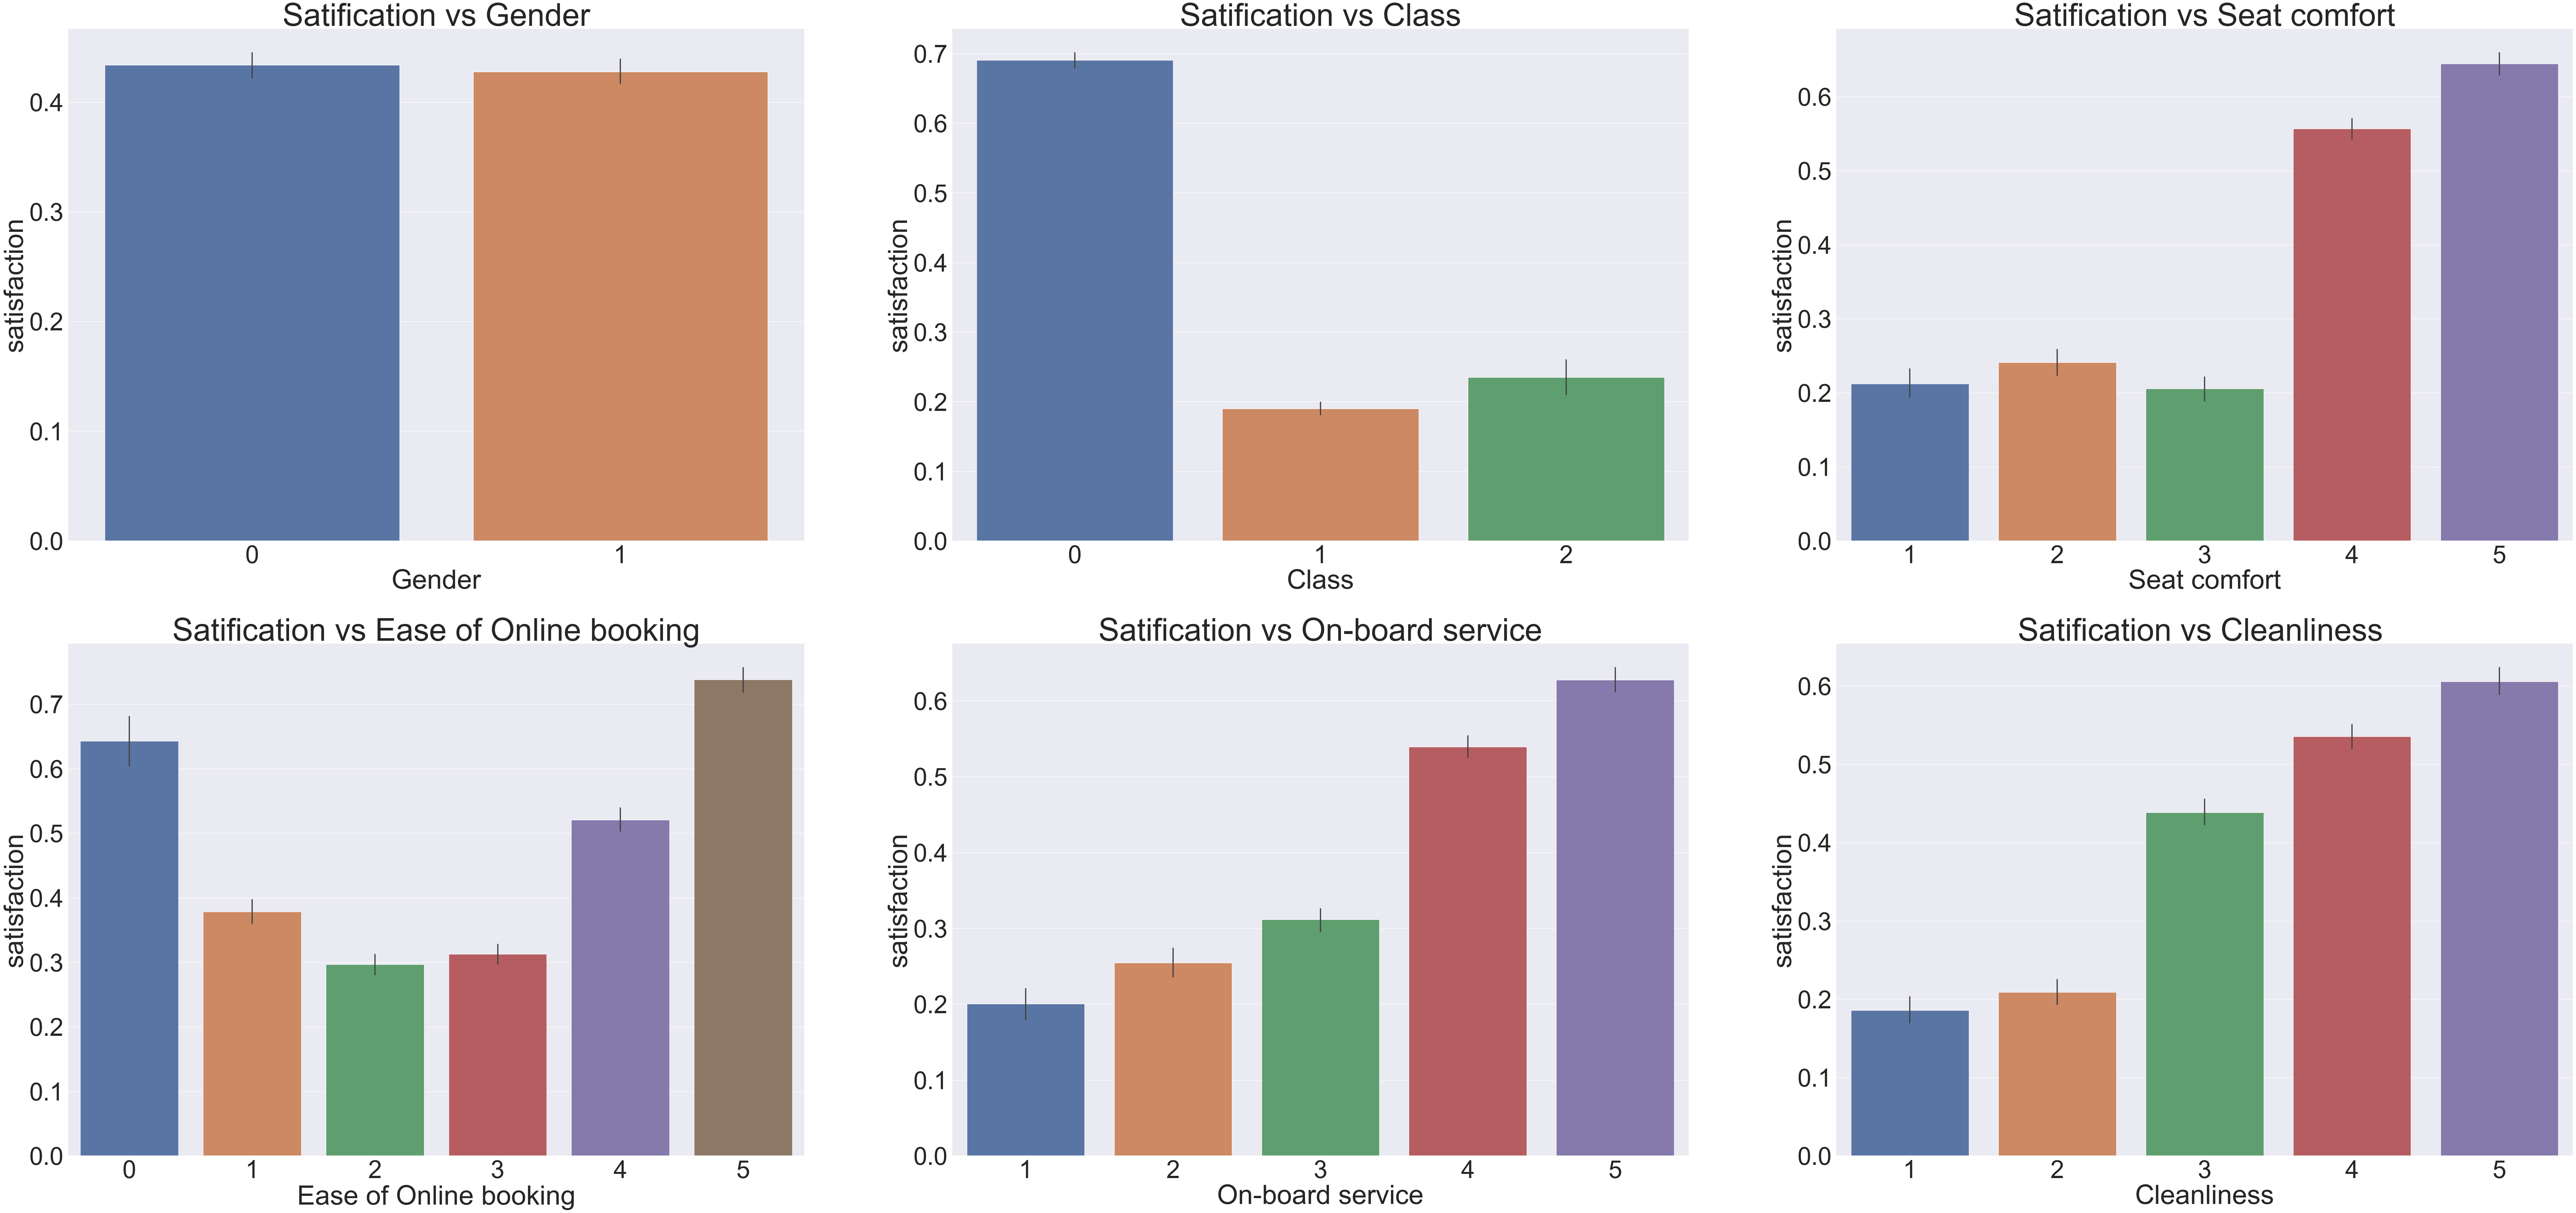

In [64]:
#Barchart Visualizing
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Satification vs Gender",fontsize=70)
sns.barplot(y = 'satisfaction', x = 'Gender', data = airline_dataset)

plt.subplot(332)
plt.title("Satification vs Class",fontsize=70)
sns.barplot(y = 'satisfaction', x = 'Class',data = airline_dataset)

plt.subplot(333)
plt.title("Satification vs Seat comfort",fontsize=70)
sns.barplot(y = 'satisfaction', x = 'Seat comfort',data = airline_dataset)

plt.subplot(334)
plt.title("Satification vs Ease of Online booking",fontsize=70)
sns.barplot(y = 'satisfaction', x = 'Ease of Online booking',data = airline_dataset)

plt.subplot(335)
plt.title("Satification vs On-board service",fontsize=70)
sns.barplot(y = 'satisfaction', x = 'On-board service',data = airline_dataset)

plt.subplot(336)
plt.title("Satification vs Cleanliness ",fontsize=70)
sns.barplot(y = 'satisfaction', x = 'Cleanliness',data = airline_dataset)
            

In [65]:
# Age vs satisfaction
airline_dataset[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Age,satisfaction
67,74,0.750000
41,48,0.631579
36,43,0.619497
39,46,0.614887
46,53,0.609756
...,...,...
0,7,0.094118
70,77,0.090909
2,9,0.072072
69,76,0.000000


In [66]:
# Gender vs satisfaction
airline_dataset[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

# 0 -> Male
# 1 -> Female

,Gender,satisfaction
0,0,0.433857
1,1,0.427673


### Training the model 

In [67]:
#Splitting featuers and target
x = airline_dataset.drop(columns = 'satisfaction', axis = 1)
y = airline_dataset['satisfaction']

In [68]:
print(y)

52755    1
78434    1
15248    1
44986    1
26963    1
        ..
78204    0
11340    1
69696    0
11835    0
87691    0
Name: satisfaction, Length: 14957, dtype: int64


In [69]:
print(x)

       Gender  Age  Class  Flight Distance  Inflight wifi service  \
52755       1   30      0             1249                      1   
78434       1   50      0             2693                      5   
15248       0   48      0             1665                      4   
44986       0   27      0             3989                      5   
26963       0   30      0              612                      4   
...       ...  ...    ...              ...                    ...   
78204       1   56      1              359                      4   
11340       1   51      0             3590                      4   
69696       1   35      1              288                      1   
11835       0   29      1              967                      1   
87691       0   16      1              413                      3   

       Departure/Arrival time convenient  Ease of Online booking  \
52755                                  1                       1   
78434                              

In [70]:
#Scaling data
standard_scaler = StandardScaler()
x = standard_scaler.fit_transform(x)
print(x)

[[ 0.97968088 -0.61459869 -0.96038443 ...  1.31556137  0.20984321
   0.01008372]
 [ 0.97968088  0.71076916 -0.96038443 ... -0.20659005 -0.39491206
   0.01008372]
 [-1.02074055  0.57823237 -0.96038443 ...  1.31556137  0.20984321
  -0.20973366]
 ...
 [ 0.97968088 -0.28325673  0.62948496 ... -1.72874148  1.41935375
   1.27403367]
 [-1.02074055 -0.68086708  0.62948496 ... -1.72874148  1.69424251
   1.32898801]
 [-1.02074055 -1.54235618  0.62948496 ...  1.31556137 -0.06504555
   0.14746958]]


In [71]:
# dividing the data into training data and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=2)

In [72]:
print(x.shape, x_train.shape, x_test.shape)

(14957, 19) (11217, 19) (3740, 19)


In [73]:
print(y.shape,y_train.shape,y_test.shape)

(14957,) (11217,) (3740,)


In [74]:
#Preparing dataframe to print the models and their respecrive accuracy
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])

## Random Forest 

In [75]:
# Create a model using RandomForestClassifier
model = RandomForestClassifier()

In [76]:
# Utilize a training set to train model.
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [77]:
# Utilizing testing set to test model
accuracy = model.score(x_test, y_test)
print('Random Forest Classifier')
print(f'Model accuracy\t\t: {accuracy}')
print(f'Accuracy in Percentage\t: {"{:.1%}".format(accuracy)}')
print(classification_report(y_test, y_pred))

Random Forest Classifier
Model accuracy		: 0.9387700534759358
Accuracy in Percentage	: 93.9%
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2126
           1       0.93      0.92      0.93      1614

    accuracy                           0.94      3740
   macro avg       0.94      0.94      0.94      3740
weighted avg       0.94      0.94      0.94      3740



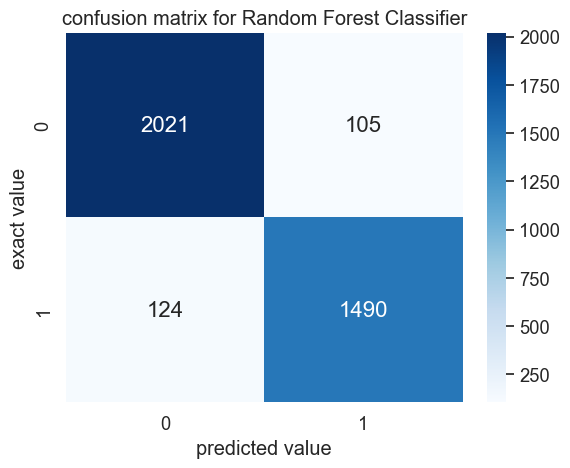

In [78]:
# confusion matrix for random forest
con_matrrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.set(font_scale=1.2)  # Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')  # Create heatmap

plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for Random Forest Classifier')

plt.show()

## Logestic Regression

In [79]:
#Create a model using LogisticRegression
LRmodel = LogisticRegression()

In [80]:
# Utilize a training set to train model
LRmodel.fit(x_train, y_train)
y_pred = LRmodel.predict(x_test)

In [81]:
# Utilizing testing set to test the model
acc = LRmodel.score(x_test, y_test)
print('Logistic Regression scores')
print(f'Model accuracy\t\t: {acc}')
print(f'Accuracy in Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))

Logistic Regression scores
Model accuracy		: 0.8443850267379679
Accuracy in Percentage	: 84.4%
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2126
           1       0.83      0.81      0.82      1614

    accuracy                           0.84      3740
   macro avg       0.84      0.84      0.84      3740
weighted avg       0.84      0.84      0.84      3740



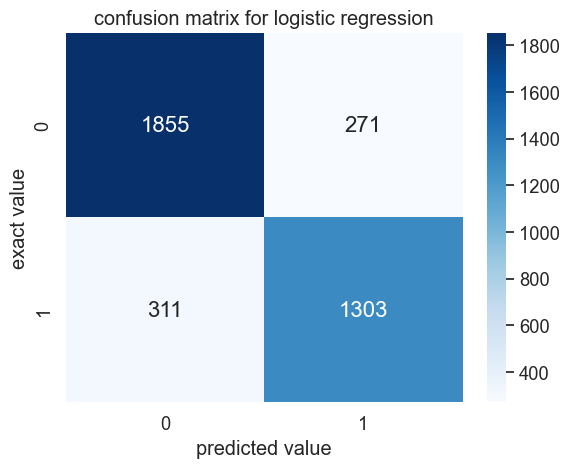

In [82]:
# confusion matrix for logistic regression
con_matrrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.set(font_scale=1.2)  # Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')  # Create heatmap

# Add labels and title
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for logistic regression')

plt.show()

## SVC

In [83]:
# Create a model using SVC classifier
model = SVC()

In [84]:
# Utilize a training set to train the model
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [85]:
# Utilizing testing set to test model
acc = model.score(x_test, y_test)
#y_pred = model.predict(x_test)

print('SVC Classifier scores')
print(f'Model accuracy\t\t: {acc}')
print(f'Accuracy in Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))

SVC Classifier scores
Model accuracy		: 0.9235294117647059
Accuracy in Percentage	: 92.4%
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2126
           1       0.92      0.90      0.91      1614

    accuracy                           0.92      3740
   macro avg       0.92      0.92      0.92      3740
weighted avg       0.92      0.92      0.92      3740



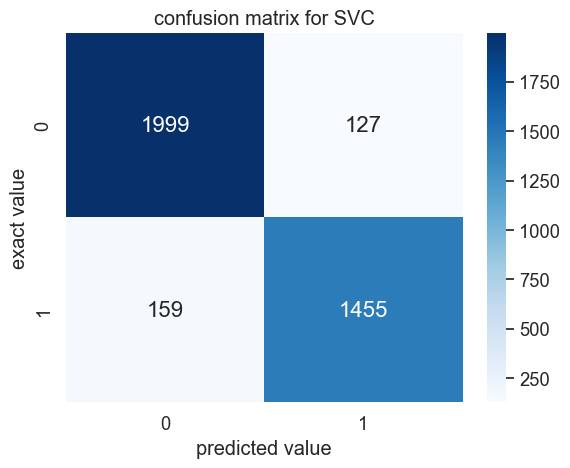

In [86]:
# confusion matrix for SVC
con_matrrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.set(font_scale=1.2)  # Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')  # Create heatmap

# Add labels and title
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for SVC')

plt.show()

## Decision Tree 

In [87]:
#Create a model using DecisionTree
model = DecisionTreeClassifier()

In [89]:
# Utilize a training set to train model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [90]:
# Utilizing testing set to test the model
acc = model.score(x_test, y_test)

print('Decision Tree Classifier scores')
print(f'Model accuracy\t\t: {acc}')
print(f'Accuracy in Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))

Decision Tree Classifier scores
Model accuracy		: 0.9008021390374331
Accuracy in Percentage	: 90.1%
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2126
           1       0.88      0.89      0.89      1614

    accuracy                           0.90      3740
   macro avg       0.90      0.90      0.90      3740
weighted avg       0.90      0.90      0.90      3740



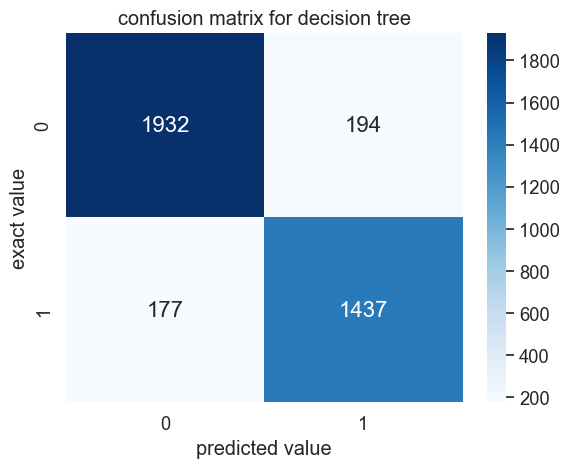

In [91]:
# confusion matrix for decision tree
con_matrrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.set(font_scale=1.2)  # Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')  # Create heatmap

# Add labels and title
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for decision tree')

plt.show()

## Predictions on a Single Input

In [92]:
# Building a predictive system
# get the input values
input_data = (1,50,0,2643,4,4,4,4,4,4,5,5,5,5,4,5,5,0,0.0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = LRmodel.predict(input_data_reshape)
if prediction == 1:
    print('Passenger satisfied!!!')
else:
    print('Passenger Neutral or Dissatisfied')

Passenger satisfied!!!
